In [19]:
import pandas as pd
import warnings
from matplotlib import pyplot
from scipy.stats import norm

In [2]:
dataset = pd.read_csv("Placement.csv")
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [3]:
#Checking the Null Value
warnings.filterwarnings("ignore")
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

# 1) Replacing Null Value

In [4]:
#Replacing Null Value

dataset.fillna(0,inplace = True)
dataset

#We are replacing the null values in the Salary column with 0, since this column directly depends on the job status (placed / Not Placed),
#so if the person is not placed, then we will not get the salary

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# 2) How many of them are not placed

In [5]:
place_cnt = dataset[dataset["status"] != "Placed"].shape[0]
print(f"Totally '{place_cnt}' students were not placed and looking for the opportunity")

Totally '67' students were not placed and looking for the opportunity


# 3) Find the reason for non placement from the dataset

In [6]:
dataset[dataset["status"] != "Placed"]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,0.0
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,0.0
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,0.0
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,0.0
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,0.0
201,202,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,0.0
206,207,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,0.0
208,209,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,0.0


# 4) What kind of relation between salary and mba_p

# 5) Which specialization is getting minimum salary

In [8]:
min_sal_dataset = dataset[dataset["salary"] == dataset["salary"][dataset["status"] == "Placed"].min()]
salary = list(set(min_sal_dataset["salary"]))[0]
sepecialisation = ', '.join(list(set(min_sal_dataset["specialisation"]))).replace("'"," ")
print(f"Specialisations like {sepecialisation} getting minimum salary of {salary}")


Specialisations like Mkt&HR, Mkt&Fin getting minimum salary of 200000.0


# 6) How many of them getting above 500000 salary

In [9]:
sal_5l = dataset[dataset["salary"] > 500000].shape[0]

print(f"Nearly {sal_5l} Members getting Salary greater than 5,00,000 Rupees")

Nearly 3 Members getting Salary greater than 5,00,000 Rupees


# 7) Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing)


# 8) Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Make decision using Hypothesis Testing)


# 9) Convert the normal distribution to standard normal distribution for salary column

<Axes: xlabel='salary', ylabel='Density'>

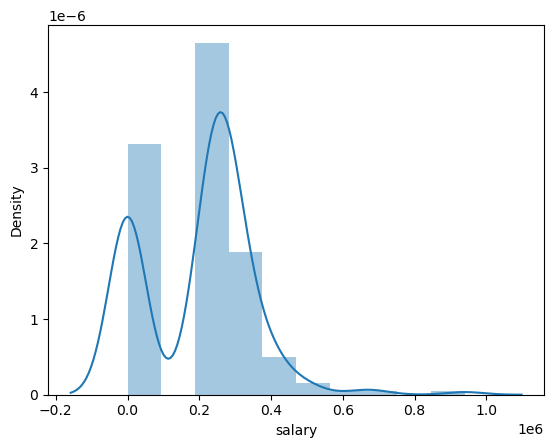

In [10]:
import seaborn as sns
sns.distplot(dataset["salary"]) 

270000.0 => 0.46063604819739223 
200000.0 => 0.008383942686872693 
250000.0 => 0.33142116090867235 
0.0 => -1.283764930200326 
425000.0 => 1.4620514246849712 
0.0 => -1.283764930200326 
0.0 => -1.283764930200326 
252000.0 => 0.34434264963754435 
231000.0 => 0.20866701798438847 
0.0 => -1.283764930200326 
260000.0 => 0.3960286045530323 
250000.0 => 0.33142116090867235 
0.0 => -1.283764930200326 
218000.0 => 0.12467734124672057 
0.0 => -1.283764930200326 
200000.0 => 0.008383942686872693 
300000.0 => 0.654458379130472 
0.0 => -1.283764930200326 
0.0 => -1.283764930200326 
236000.0 => 0.24097073980656844 
265000.0 => 0.42833232637521224 
393000.0 => 1.2553076050230194 
360000.0 => 1.0421030409966316 
300000.0 => 0.654458379130472 
360000.0 => 1.0421030409966316 
0.0 => -1.283764930200326 
240000.0 => 0.2668137172643124 
265000.0 => 0.42833232637521224 
350000.0 => 0.9774955973522717 
0.0 => -1.283764930200326 
250000.0 => 0.33142116090867235 
0.0 => -1.283764930200326 
278000.0 => 0.51232

<Axes: ylabel='Density'>

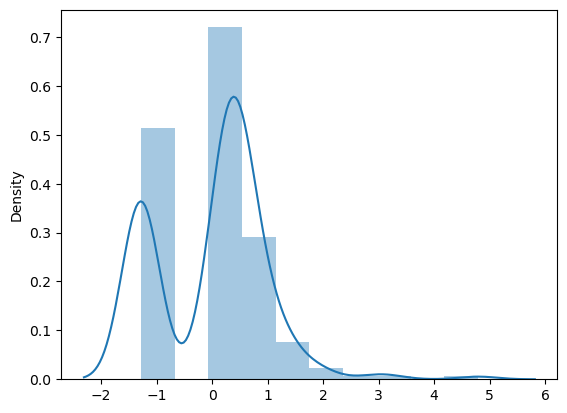

In [46]:
values = [value for value in dataset["salary"]] 
sd_mean = dataset["salary"].mean()
sd_std = dataset["salary"].std()
z_score = []
for j in values:    
    print(f"{j} => {(j - sd_mean)/sd_std} ")
    z_score.append((j - sd_mean)/sd_std)
    
#z_score = [ (j - sd_mean)/sd_std for j in values]
sns.distplot(z_score) 

In [57]:
#dataset["salary"][dataset["salary"] >= 700000]

import numpy as np

# Generate 10 equally spaced values between 3 and 4
values = np.linspace(3.1, 4.1, num=10)
list(values)


[3.1,
 3.2111111111111112,
 3.3222222222222224,
 3.433333333333333,
 3.5444444444444443,
 3.6555555555555554,
 3.7666666666666666,
 3.8777777777777773,
 3.9888888888888885,
 4.1]

# 10) What is the probability Density Function of the salary range from 700000 to 900000?

Mean : 198702.33, Standard Deviation : 154780.93
The Area Between the range 700000 and 900000 : 3.28e-06


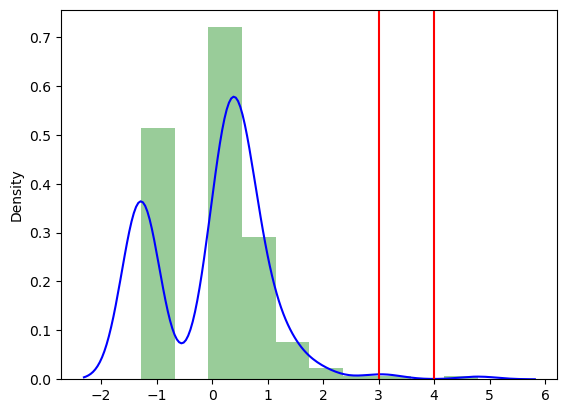

In [73]:
#PDF
#sns.distplot(z_score)
ax = sns.distplot(z_score,kde = True,kde_kws = {'color':'blue'},color = 'green')
 
startRange = int((700000 - sd_mean)/sd_std)
endRange = int((900000 - sd_mean)/sd_std)

pyplot.axvline(startRange,color= "red")
pyplot.axvline(endRange,color= "red")

values = [value for value in list(np.linspace(3.1, 4.1, num=10))]
probs = [dist.pdf(value) for value in values] 

print(f"Mean : {sample_mean}, Standard Deviation : {sample_std}\nThe Area Between the range {700000} and {900000} : { round(sum(probs), 8) }")

# 11) Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)


# 12) Which parameter is highly correlated with salary

In [80]:
dataset[["salary","hsc_p","ssc_p","etest_p","mba_p"]].corr()

,salary,hsc_p,ssc_p,etest_p,mba_p
salary,1.000000,0.452569,0.538090,0.186988,0.139823
hsc_p,0.452569,1.000000,0.511472,0.245113,0.354823
ssc_p,0.538090,0.511472,1.000000,0.261993,0.388478
etest_p,0.186988,0.245113,0.261993,1.000000,0.218055
mba_p,0.139823,0.354823,0.388478,0.218055,1.000000


# 13) plot any useful graph and explain it